Version 2, edited by Clare on Feb 20, 2018 (14:10 CT)

# Compute fourier coefficients using FFT 

## The fourier coefficients

A periodic function $Z(\lambda)$ with a period of $2\pi$ can be expressed as a Fourier series:
$$Z(\lambda) = \frac{1}{2}a_0 + \sum_{k=1}^{\infty} (a_k\cos(k\lambda) + b_k\sin(k\lambda)).$$
Its complex version is
$$Z(\lambda) = \sum_{k=-\infty}^{\infty} c_k e^{-ik\lambda}$$
where $c_k = a_k - i b_k$ and $c_{-k} = a_k + i b_k$.

The Fourier coefficient can be computed using the orthogoal relationship between trigonometric functions. In terms of the complex coefficient $c_k$:
$$ c_k = \frac{1}{2 \pi} \int^{2\pi}_{0} Z(\lambda) e^{-ik\lambda} d\lambda. $$

In climate science, the physical fields often exhibit periodicity in space and time. For example, the [Milankovitch cycles](https://en.wikipedia.org/wiki/Milankovitch_cycles) explain partially variation of the Earth's climate observed at certain time scales (e.g. periodicity in eccentricity, axial tilt, and precession of the Earth's orbit). By computing the coefficients $c_k$, one got to know the magnitude of the component in the field associated with the period $\frac{2\pi}{k}$.

Recall that the definitions of Fourier transform and inverse Fourier transform are
$$\hat{Z}(k) = \int^\infty_{-\infty} Z(\lambda) e^{-ik\lambda} d\lambda$$
$$Z(\lambda) = \frac{1}{2\pi}\int^\infty_{-\infty} \hat{Z}(k) e^{ik\lambda} dk.$$

Relating $\hat{Z}(k)$ and $c_k$ gives
$$\hat{Z}(k) = 2\pi c_k = 2\pi (a_k - i b_k)$$

Numerically, the fourier coefficients $c_k$ can be obtained using fast Fourier Transform (FFT). Given the data $Z(\lambda)$ on $N$ discrete points evenly spaced between 0 to $2\pi$ with spacing $T = 2\pi/N$, to evaluate $\hat{Z}(k)$ numerically, since data only exists on the discrete grid points,
$$ \hat{Z}(k) \approx \sum^{N-1}_{n=0} Z(nT) e^{-iknT} = \sum^{N-1}_{n=0} Z(nT) e^{-i\frac{2\pi k n}{N}}.$$

$\hat{Z}(k)$, and thus $c_k$, can be computed using the FFT function in the SciPy package.

### Loading modules for fast fourier transform (FFT) and inverse fast fourier transform (IFFT) from SciPy package

In [2]:
from scipy.fftpack import fft, ifft # Load fast fourier transform packages from scipy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi

### An example of FFT and IFFT operation

As an illustration of how the SciPy FFT package is used, I'm creating set of N evenly spaced discrete data points (and naming it ```x```). In the example below, there are totally $N=100$ points sampled between the range 0 to $2\pi$. For simplicity, I use a consine function to generate the data points here. The $n$-th data point is given by:
$$ y_n = \cos x_n = \cos\left(\frac{2\pi n}{N} \right).$$

In [3]:
N = 100 # spacing of data / resolution
x = 2*pi*np.arange(N)/N
y = np.cos(x)

Let's plot the data and see how it looks like:

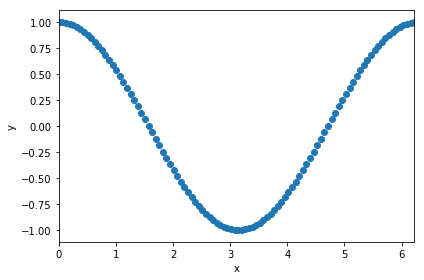

In [4]:
plt.scatter(x,y)
plt.xlim((x.min(),x.max()))
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

We know that $$y = \cos(\lambda)$$ can be written as $$y = \frac{1}{2} e^{-i\lambda} + \frac{1}{2} e^{i\lambda}.$$ The coefficients $$c_{-1} = c_{1} = \frac{1}{2}$$ while other coefficients are zeros.


Let's trying doing a discrete FFT on $y$. Note that the output of ```fft(y)``` is in fact $N c_k$ given $c_k$ defined above. A factor of $\frac{1}{N}$ is multipled here to recover $c_k$.

In [6]:
ck = 1/N * fft(y)
print(ck.size)

100


What do the 100 elements in ```ck``` represent? Referring to the SciPy documentation (```y``` in the documentation below is ```N*ck``` in this notebook):

> For N even, the elements y[1]...y[N/2−1] contain the positive-frequency terms, and the elements y[N/2]...y[N−1] contain the negative-frequency terms, in order of decreasingly negative frequency. For N odd, the elements y[1]...y[(N−1)/2] contain the positive- frequency terms, and the elements y[(N+1)/2]...y[N−1] contain the negative- frequency terms, in order of decreasingly negative frequency.

In the example I show here, $\cos \left(\frac{2\pi n}{N} \right)$ is an even function. We would expect the positive and negative frequency terms corresponding to the same frequency have the same magnitude. Let's check if that's the case.

In [7]:
T = 1./x.size
xf = np.hstack(( np.arange(0,N//2), np.arange(-N//2,0) ))

Confirm that ```xf``` and ```ck``` are of the same size:

In [8]:
print('xf.size=',xf.size)
print('ck.size=',ck.size)

xf.size= 100
ck.size= 100


Let's print out the coefficient $c_k$ and see how they look like:

In [9]:
print(ck[:10])

[ -2.33146835e-17 +0.00000000e+00j   5.00000000e-01 -6.80047730e-17j
   5.75160293e-18 -2.45929817e-17j   2.56533007e-17 -5.69044597e-18j
   1.17745885e-18 +2.78004314e-17j  -1.18692392e-17 -2.10361300e-17j
   2.95612411e-19 +1.16984114e-17j   1.08261127e-17 +2.82636527e-17j
  -1.03792696e-17 +7.06374423e-19j   5.55492036e-18 -1.20217872e-17j]


Since cos is an even function, the imaginary part of $c_k$ are zero. Only the real part of $c_1$ is non-vanishing (as expected). Let's plot $\|c_k\|$ in a bar graph, where $n \in [-10,10]$:

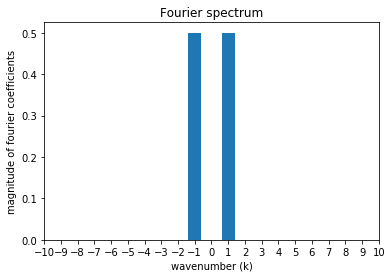

In [10]:
plt.bar(xf, np.abs(ck)) # Take the absolute value. 
# In this case, cosine is an even function, so this is equivalent to the real value.
plt.xticks(xf)
plt.xlim((-10,10))
plt.title('Fourier spectrum')
plt.xlabel('wavenumber (k)');
plt.ylabel('magnitude of fourier coefficients');
plt.show()

#### Inverse Fourier transform

To recover the series from the fourier coefficients, you can use the inverse fourier transform function (```ifft```) as demonstrated below. Note that if ```y = fft(x)```, then ```x = ifft(y)```.

/home/csyhuang/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


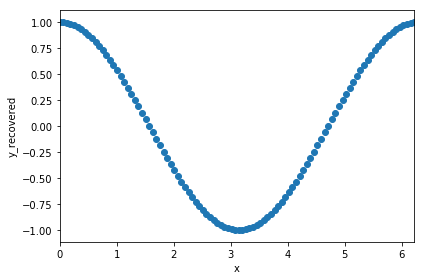

In [11]:
y_recovered = ifft(N * ck)

plt.scatter(x,y_recovered)
plt.xlim((x.min(),x.max()))
plt.xlabel('x')
plt.ylabel('y_recovered')
plt.tight_layout()
plt.show()

### Exercise for Claire

For each of the following functions, 
- describe how you would expect the fourier spectrum ($c_k$) to look like;
- use the results from FFT to confirm your answer; and lastly,
- recover the original time series using the fourier coefficients obtained from FFT, and plot it out.  

**Bonus question**: Can you initialize a array ```ck_4``` such that IFFT would recover $\sin\lambda$?  
Hint: In python, ```j``` denotes the imaginary unit. If I want to construct $\cos\lambda$ from fourier coefficients ```ck_x```, I would initialize ```ck_x``` by:
```
ck_x = np.zeros((N),'complex')
ck_x[1] = 0.5+0.j
ck_x[-1] = 0.5+0.j
y_recovered = ifft(N * ck)
```

#### Question 1
$f(\lambda) = 1 + 2\cos \lambda - 3\sin \lambda$.  
How would the spectrum look like? Which coefficients $\|c_k\|$ are non-trivial? What are their expected values?   
(Double click to type in your answer, and then press Shift+return)

In [34]:
# Type your code here for Question 1
N1 = 100 # spacing of data / resolution
x1 = np.arange(0,N)
y1 = None # replace None with your code

# Write your code for fourier transform and plotting the graphs

#### Question 2
$f(\lambda) = \cos 2\lambda - 5\sin 3\lambda$.  
How would the spectrum look like? Which coefficients $\|c_k\|$ are non-trivial? What are their expected values?   
(Double click to type in your answer, and then press Shift+return)

In [35]:
# Type your code here for Question 2


#### Question 3
$f(\lambda) = 1 + 2\cos \lambda - 3\sin \lambda$.  
How would the spectrum look like? For Question 3, it is good enough to give qualitative description.  
(Double click to type in your answer, and then press Shift+return)

In [36]:
# Type your code here for Question 3


**Bonus question**: Can you initialize a array ```ck_4``` such that IFFT would recover $\sin\lambda$?  
Hint: In python, ```j``` denotes the imaginary unit. If I want to construct $\cos\lambda$ from fourier coefficients ```ck_x```, I would initialize ```ck_x``` by:
```
ck_x = np.zeros((N),'complex')
ck_x[1] = 0.5+0.j
ck_x[-1] = 0.5+0.j
y_recovered = ifft(N * ck)
```

In [38]:
# Type your code here for the bonus question

